# Healthylife insurance charge prediction

## Problem Statement
HealthyLife is a leading insurance company headquartered in New York City, serving customers nationwide with a range of insurance policies, including health, auto, and life insurance. Currently, the company relies on traditional methods to assess insurance charges based on customer details such as age, sex, and BMI. However, they face challenges in accurately predicting insurance charges due to limited insights into how different customer attributes impact premiums. This uncertainty leads to potential underpricing or overpricing of policies, affecting both profitability and customer satisfaction. To address these challenges, the company is looking to leverage advanced predictive modeling techniques to enhance its insurance charge estimation process and provide more accurate and personalized pricing to customers.

## Objective
As a Data Scientist hired by the insurance company, the objective is to develop an app and implement a predictive model for estimating insurance charges based on customer attributes. The primary challenges to solve include improving the accuracy of insurance charge predictions by incorporating various customer attributes, streamlining the underwriting process to enhance efficiency and customer experience, and maintaining regulatory compliance while optimizing pricing strategies also analyze and identify the driftness in model and data to understand the model behavior overtime

By achieving these objectives


*   We aim to achieve more accurate and personalized insurance charge estimations
*   Reducing the risks of underpricing and overpricing
*   Improve customer satisfaction and loyalty through fair and competitive pricing
*   Ensuring transparency and compliance with regulatory requirements in pricing strategies will further strengthen our competitive position in the market and enhance overall business performance








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



### Import the required libraries

In [ ]:
import sklearn
import joblib

from sklearn.datasets import fetch_openml

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
        
        Copyright (c) 2007-2024 The scikit-learn developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distribution.
        
        * Neither the name of the copyright holder nor the names of its
          contributors may be used to endorse or promote produ

## Import the Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Adv-Python/Project2_ADV_Python_HF/insurance.csv')


In [ ]:
data_df = data.copy(deep=True)

In [ ]:
data_df.shape

(1338, 8)

In [ ]:
data_df.sample(5)

,index,age,sex,bmi,children,smoker,region,charges
685,685,53,male,26.410,2,no,northeast,11244.37690
319,319,32,male,37.335,1,no,northeast,4667.60765
316,316,50,male,32.205,0,no,northwest,8835.26495
625,625,29,female,26.030,0,no,northwest,3736.46470
632,632,29,female,35.530,0,no,southeast,3366.66970


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [ ]:
# split data in to numerical and categorical
target = 'charges'
numeric_features = ['age','bmi','children']
categorical_features = ['sex', 'smoker', 'region']

In [ ]:
# display the statistical summary of the numerical, categorical and target data
data_df[numeric_features].describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


In [ ]:
data_df[categorical_features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
data_df[target].describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


In [ ]:
data_df["charges"].max()

63770.42801

In [ ]:
data_df_sorted_non_smoker = data_df[data_df["smoker"] == 'no'].sort_values(by=["charges"], ascending=False)
data_df_sorted_non_smoker

,index,age,sex,bmi,children,smoker,region,charges
1206,1206,59,female,34.800,2,no,southwest,36910.60803
1012,1012,61,female,33.330,4,no,southeast,36580.28216
242,242,55,female,26.800,1,no,southwest,35160.13457
599,599,52,female,37.525,2,no,northwest,33471.97189
936,936,44,male,29.735,2,no,northeast,32108.66282
...,...,...,...,...,...,...,...,...
22,22,18,male,34.100,0,no,southeast,1137.01100
663,663,18,male,33.660,0,no,southeast,1136.39940
1244,1244,18,male,33.330,0,no,southeast,1135.94070
808,808,18,male,30.140,0,no,southeast,1131.50660


In [ ]:
data_df_sorted_smoker_age = data_df[data_df["smoker"]=='yes'].sort_values(by=["age"], ascending=False)

data_df_sorted_smoker_age

,index,age,sex,bmi,children,smoker,region,charges
94,94,64,female,31.300,2,yes,southwest,47291.05500
328,328,64,female,33.800,1,yes,southwest,47928.03000
890,890,64,female,26.885,0,yes,northwest,29330.98315
1241,1241,64,male,36.960,2,yes,southeast,49577.66240
1265,1265,64,male,23.760,0,yes,southeast,26926.51440
...,...,...,...,...,...,...,...,...
161,161,18,female,36.850,0,yes,southeast,36149.48350
1282,1282,18,female,21.660,0,yes,northeast,14283.45940
1170,1170,18,male,27.360,1,yes,northeast,17178.68240
1204,1204,18,female,27.280,3,yes,southeast,18223.45120


In [ ]:
data_df_sorted_smoker = data_df[data_df["smoker"]=='yes'].sort_values(by=["charges"], ascending=False)

data_df_sorted_smoker

,index,age,sex,bmi,children,smoker,region,charges
543,543,54,female,47.410,0,yes,southeast,63770.42801
1300,1300,45,male,30.360,0,yes,southeast,62592.87309
1230,1230,52,male,34.485,3,yes,northwest,60021.39897
577,577,31,female,38.095,1,yes,northeast,58571.07448
819,819,33,female,35.530,0,yes,northwest,55135.40209
...,...,...,...,...,...,...,...,...
412,412,26,female,17.195,2,yes,northeast,14455.64405
1282,1282,18,female,21.660,0,yes,northeast,14283.45940
362,362,19,female,21.700,0,yes,southwest,13844.50600
1033,1033,18,male,21.565,0,yes,northeast,13747.87235


In [ ]:
data_df_sorted = data_df.sort_values(by=["age","bmi"], ascending=False)

data_df_sorted

,index,age,sex,bmi,children,smoker,region,charges
534,534,64,male,40.480,0,no,southeast,13831.11520
768,768,64,female,39.700,0,no,southwest,14319.03100
199,199,64,female,39.330,0,no,northeast,14901.51670
418,418,64,male,39.160,1,no,southeast,14418.28040
603,603,64,female,39.050,3,no,southeast,16085.12750
...,...,...,...,...,...,...,...,...
1033,1033,18,male,21.565,0,yes,northeast,13747.87235
1212,1212,18,male,21.470,0,no,northeast,1702.45530
359,359,18,female,20.790,0,no,southeast,1607.51010
250,250,18,male,17.290,2,yes,northeast,12829.45510


In [ ]:
data_df_sorted_region_nw = data_df[data_df["region"]=='northwest'].sort_values(by=["charges"], ascending=False)

data_df_sorted_region_nw

,index,age,sex,bmi,children,smoker,region,charges
1230,1230,52,male,34.485,3,yes,northwest,60021.39897
819,819,33,female,35.530,0,yes,northwest,55135.40209
55,55,58,male,36.955,2,yes,northwest,47496.49445
1301,1301,62,male,30.875,3,yes,northwest,46718.16325
1122,1122,53,female,36.860,3,yes,northwest,46661.44240
...,...,...,...,...,...,...,...,...
464,464,19,male,25.175,0,no,northwest,1632.03625
943,943,19,male,22.610,0,no,northwest,1628.47090
747,747,19,male,21.755,0,no,northwest,1627.28245
35,35,19,male,20.425,0,no,northwest,1625.43375


In [ ]:
data_df_sorted_region_ne = data_df[data_df["region"]=='northeast'].sort_values(by=["charges"], ascending=False)

data_df_sorted_region_ne

,index,age,sex,bmi,children,smoker,region,charges
577,577,31,female,38.095,1,yes,northeast,58571.07448
281,281,54,male,40.565,3,yes,northeast,48549.17835
330,330,61,female,36.385,1,yes,northeast,48517.56315
288,288,59,female,36.765,1,yes,northeast,47896.79135
883,883,51,female,37.050,3,yes,northeast,46255.11250
...,...,...,...,...,...,...,...,...
121,121,18,male,23.750,0,no,northeast,1705.62450
1041,1041,18,male,23.085,0,no,northeast,1704.70015
295,295,18,male,22.990,0,no,northeast,1704.56810
1212,1212,18,male,21.470,0,no,northeast,1702.45530


In [ ]:
data_df_sorted_region_se = data_df[data_df["region"]=='southeast'].sort_values(by=["charges"], ascending=False)

data_df_sorted_region_se

,index,age,sex,bmi,children,smoker,region,charges
543,543,54,female,47.41,0,yes,southeast,63770.42801
1300,1300,45,male,30.36,0,yes,southeast,62592.87309
1241,1241,64,male,36.96,2,yes,southeast,49577.66240
1062,1062,59,male,41.14,1,yes,southeast,48970.24760
488,488,44,female,38.06,0,yes,southeast,48885.13561
...,...,...,...,...,...,...,...,...
22,22,18,male,34.10,0,no,southeast,1137.01100
663,663,18,male,33.66,0,no,southeast,1136.39940
1244,1244,18,male,33.33,0,no,southeast,1135.94070
808,808,18,male,30.14,0,no,southeast,1131.50660


In [ ]:
data_df_sorted_region_sw = data_df[data_df["region"]=='southwest'].sort_values(by=["charges"], ascending=False)

data_df_sorted_region_sw

,index,age,sex,bmi,children,smoker,region,charges
1146,1146,60,male,32.8,0,yes,southwest,52590.82939
34,34,28,male,36.4,1,yes,southwest,51194.55914
175,175,63,female,37.7,0,yes,southwest,48824.45000
39,39,60,male,39.9,0,yes,southwest,48173.36100
328,328,64,female,33.8,1,yes,southwest,47928.03000
...,...,...,...,...,...,...,...,...
487,487,19,male,28.7,0,no,southwest,1253.93600
791,791,19,male,27.6,0,no,southwest,1252.40700
584,584,19,male,20.7,0,no,southwest,1242.81600
681,681,19,male,20.3,0,no,southwest,1242.26000


#### Write your insights and findings from the statistical summary

* Total no. of records 1338
* No missing values
* Average age of the customer: 39,  Min age: 18, Max age: 64
* Smoking and a high BMI are the primary factors influencing insurance charges, followed closely by age.
* Number of children, sex and region do not seem to have much influence on the charges.

In [ ]:
# Check the missing values
data_df.isnull().sum()

,0
index,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
# check duplicated rows
data_df.duplicated().sum()

0

In [ ]:
# display the info of the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [ ]:
# drop the columns which was not required for modelling
data_df.drop(['index'], axis=1, inplace=True)

In [ ]:
data_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
data_df_sorted = data_df.sort_values(by=["charges"], ascending=False)
data_df_sorted

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
...,...,...,...,...,...,...,...
22,18,male,34.100,0,no,southeast,1137.01100
663,18,male,33.660,0,no,southeast,1136.39940
1244,18,male,33.330,0,no,southeast,1135.94070
808,18,male,30.140,0,no,southeast,1131.50660


In [ ]:
# compute the average bill amount for each day using groupby()
avg_charges_region = data_df.groupby(['region'])['charges'].mean()
avg_charges_region

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


## Exploratory data analysis

#### Charges amount distribution per sex

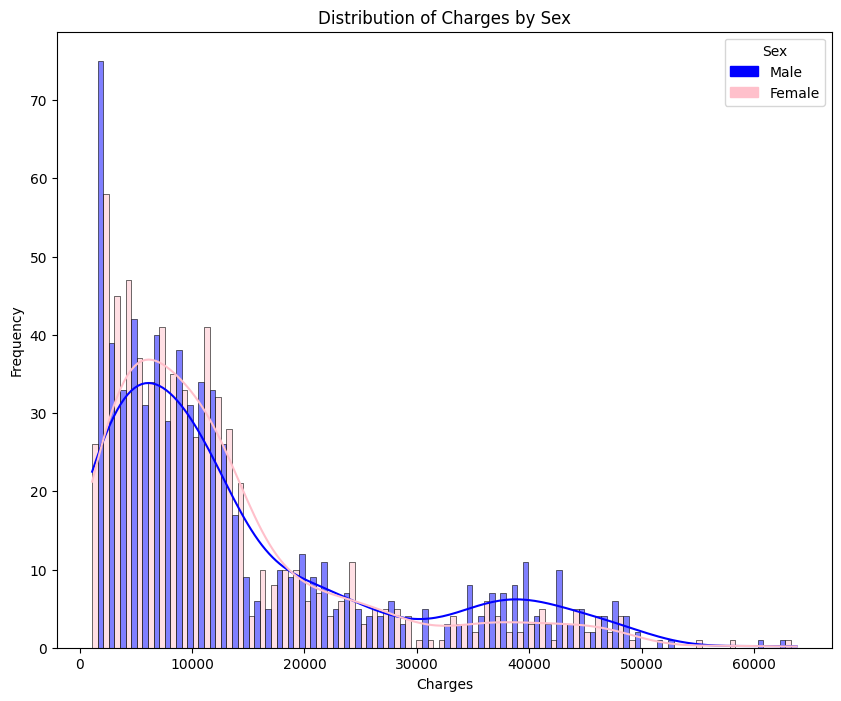

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Define custom colors for each sex
custom_palette = {"male": "blue", "female": "pink"}

# Display a dodged histogram
plt.figure(figsize=(10, 8))
sns.histplot(
    data=data_df,
    x='charges',
    hue='sex',
    kde=True,
    palette=custom_palette,  # Explicitly set colors for male and female
    binwidth=1000,
    multiple="dodge"  # Ensures bars are side by side
)
plt.title("Distribution of Charges by Sex")
plt.xlabel("Charges")
plt.ylabel("Frequency")
#plt.legend(title="Sex")  # Legend automatically matches the colors
# Create a custom legend with colored handles
legend_handles = [
    Patch(color="Blue", label="Male"),
    Patch(color="Pink", label="Female")
]
plt.legend(handles=legend_handles, title="Sex")
plt.show()


#### Distribution of Age

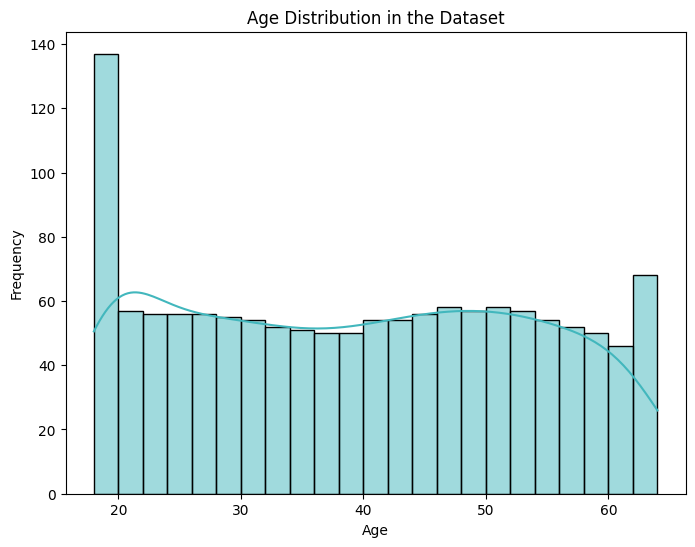

In [ ]:
# Create a histogram to display the age distribution in the dataset
plt.figure(figsize=(8, 6))
sns.histplot(data=data_df, x='age', kde=True, color='#42b7bd', binwidth=2)
plt.title("Age Distribution in the Dataset")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


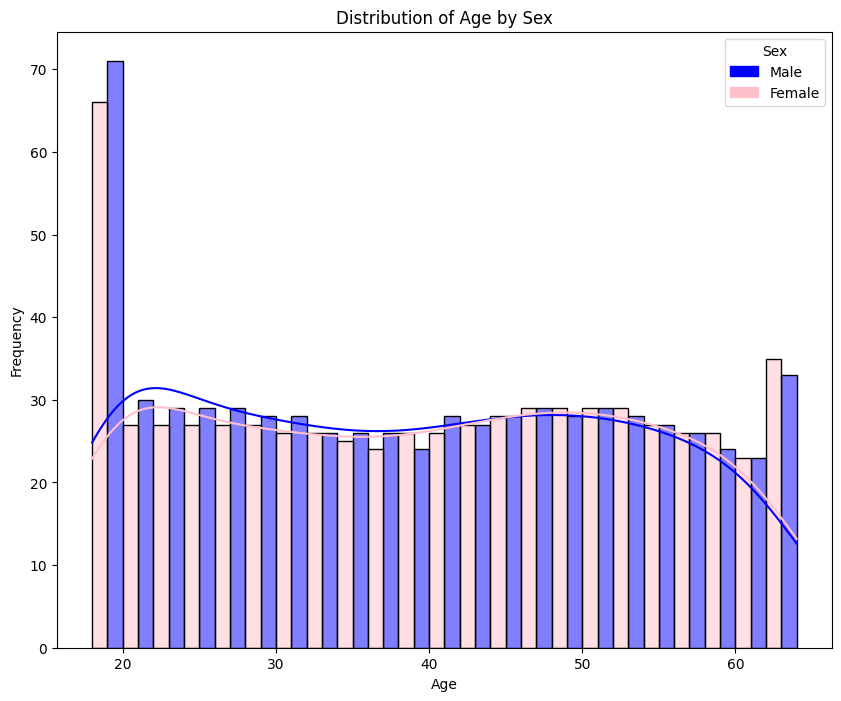

In [ ]:
# Create a histogram to display the age distribution based on sex in the dataset

# Define custom colors for each sex
custom_palette = {"male": "blue", "female": "pink"}

# Display a dodged histogram
plt.figure(figsize=(10, 8))
sns.histplot(
    data=data_df,
    x='age',
    hue='sex',
    kde=True,
    palette=custom_palette,  # Explicitly set colors for male and female
    binwidth=2,
    multiple="dodge"  # Ensures bars are side by side
)
plt.title("Distribution of Age by Sex")
plt.xlabel("Age")
plt.ylabel("Frequency")
#plt.legend(title="Sex")  # Legend automatically matches the colors

# Create a custom legend with colored handles
legend_handles = [
    Patch(color="Blue", label="Male"),
    Patch(color="Pink", label="Female")
]
plt.legend(handles=legend_handles, title="Sex")
plt.show()

In [ ]:
data_df_age_distribution = data_df[data_df['age'] < 20]
data_df_age_distribution

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
15,19,male,24.600,1,no,southwest,1837.23700
22,18,male,34.100,0,no,southeast,1137.01100
31,18,female,26.315,0,no,northeast,2198.18985
...,...,...,...,...,...,...,...
1315,18,male,28.310,1,no,northeast,11272.33139
1316,19,female,20.600,0,no,southwest,1731.67700
1317,18,male,53.130,0,no,southeast,1163.46270
1334,18,female,31.920,0,no,northeast,2205.98080


#### Charges amount distribution per smoker

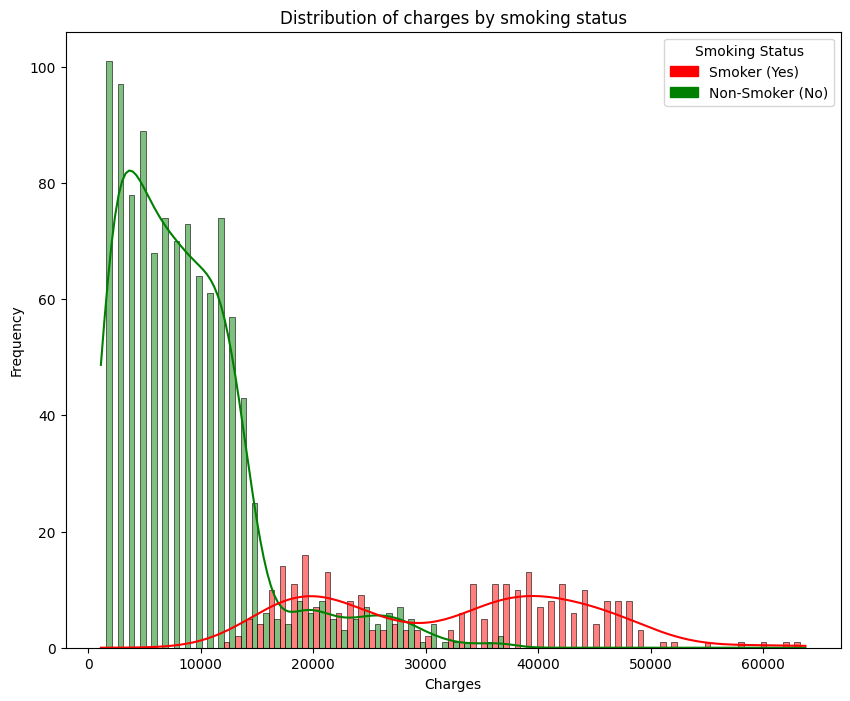

In [ ]:
# Show a histogram to visualize the distribution of charges amounts based on smoking status in the dataset

# Define custom colors for each smoking status
custom_palette = {"yes": "red", "no": "green"}

# Display a dodged histogram
plt.figure(figsize=(10, 8))
sns.histplot(
    data=data_df,
    x='charges',
    hue='smoker',
    kde=True,
    palette=custom_palette,  # Explicitly set colors for male and female
    binwidth=1000,
    multiple="dodge"  # Ensures bars are side by side
)
plt.title("Distribution of charges by smoking status")
plt.xlabel("Charges")
plt.ylabel("Frequency")
#plt.legend(title="Smoking Status")  # Legend automatically matches the colors

# Create a custom legend with colored handles
legend_handles = [
    Patch(color="red", label="Smoker (Yes)"),
    Patch(color="green", label="Non-Smoker (No)")
]
plt.legend(handles=legend_handles, title="Smoking Status")
plt.show()

#### Average BMI per age

In [ ]:
# Calculate average BMI per age
avg_bmi_per_age = data_df.groupby('age')['bmi'].mean().reset_index()

In [ ]:
avg_bmi_per_age

,age,bmi
0,18,31.326159
1,19,28.596912
2,20,30.632759
3,21,28.185714
4,22,31.087679
5,23,31.454464
6,24,29.142679
7,25,29.693929
8,26,29.428929
9,27,29.333571


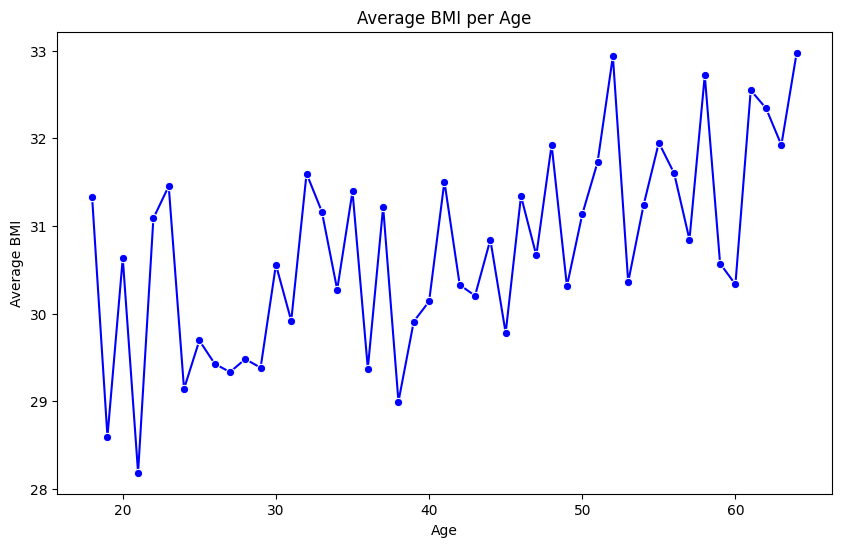

In [ ]:
# Display a line plot showing the average BMI per age using markers to highlight the data points

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_bmi_per_age, x='age', y='bmi', marker='o', color='blue')
plt.title("Average BMI per Age")
plt.xlabel("Age")
plt.ylabel("Average BMI")
plt.show()

#ci=95: Displays a 95% confidence interval (default behavior). You can adjust it (e.g., ci=68 for a 68% CI).

As we can see with time - the average BMI score starts getting higher to unhealthier ranges.

#### Age vs charges

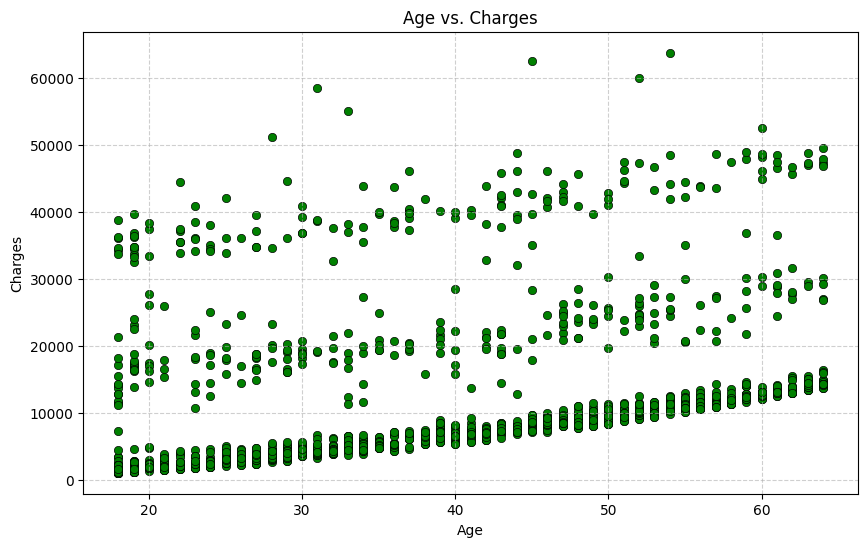

In [ ]:
# Create a scatter plot to show the relationship between Age and Charges in the dataset.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x='age', y='charges', color='green', edgecolor='black')
plt.title("Age vs. Charges")
plt.xlabel("Age")
plt.ylabel("Charges")

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)  # Enable grid, set dashed style and transparency

plt.show()

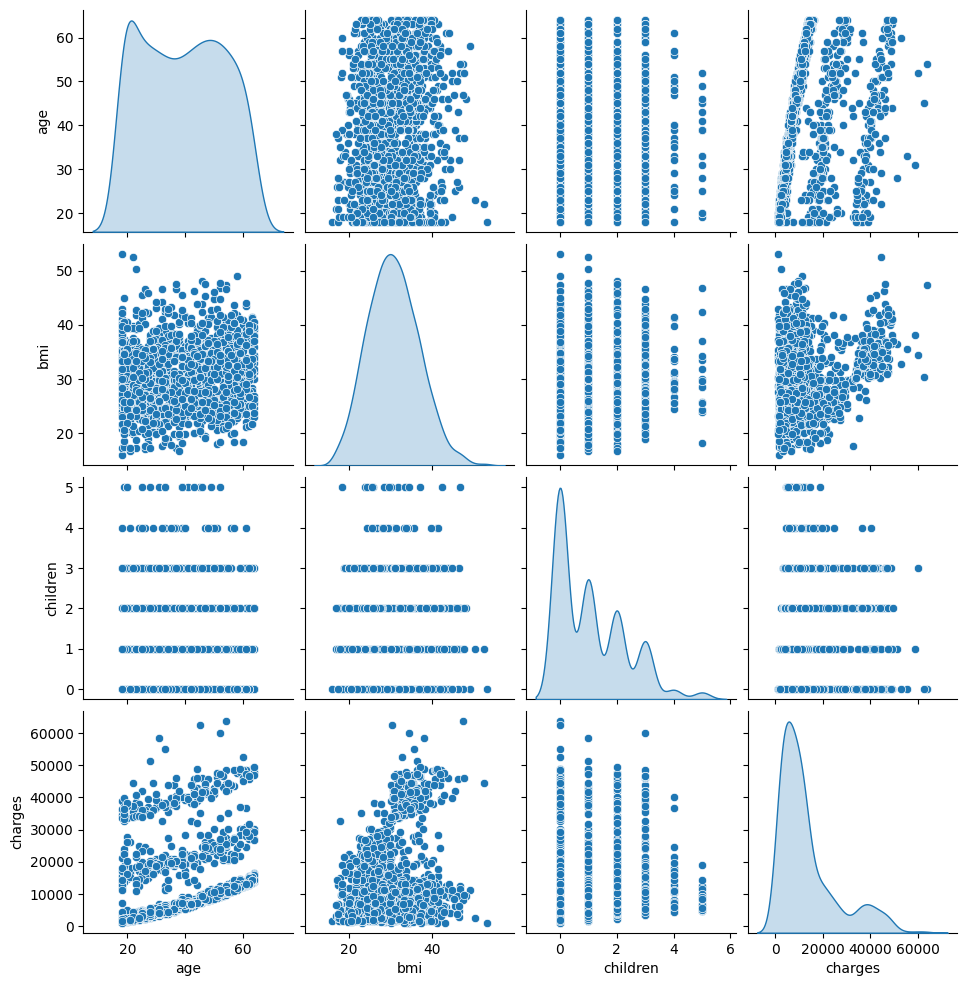

In [ ]:
sns.pairplot(data=data_df, vars=['age', 'bmi','children','charges'], diag_kind='kde')
plt.show()


## Model Estimation

In [ ]:
# write your code here

X = data_df[numeric_features + categorical_features]
y = data_df[target]

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown='ignore'), categorical_features)
)

In [ ]:
model_linear_regression = LinearRegression(n_jobs=-1)

In [ ]:
model_pipeline = make_pipeline(
    preprocessor,
    model_linear_regression
)

In [ ]:
model_pipeline.fit(Xtrain, ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression(n_jobs=-1))])

## Model Evaluation

In [ ]:
Xtest.describe()

,age,bmi,children
count,268.000000,268.000000,268.000000
mean,38.608209,31.074627,1.044776
std,13.963819,6.307051,1.163526
min,18.000000,16.815000,0.000000
25%,26.000000,26.671250,0.000000
50%,38.000000,30.780000,1.000000
75%,50.000000,35.200000,2.000000
max,64.000000,52.580000,5.000000


In [ ]:
Xtest.shape

(268, 6)

In [ ]:
ytest.head()

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180


In [ ]:
ytest.mean()

12968.317062869404

In [ ]:
# write your code here
model_pipeline.predict(Xtest)

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084137, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [ ]:
print(f"RMSE: {mean_squared_error(ytest, model_pipeline.predict(Xtest), squared=False)}")

RMSE: 5796.284659276274


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Interpretation of RMSE: 5796.284659276274

RMSE of 5796.28 indicates that, on average, the model's predictions deviate from the actual insurance charges by approximately $5,796.

Given that the average charge in the ytest dataset is about $12,968.32, this RMSE constitutes roughly 44% of the average charge, indicating a significant deviation.

Smaller RMSE is better as it indicates a model that makes more accurate predictions.


In [ ]:
print(f"R-squared: {r2_score(ytest, model_pipeline.predict(Xtest))}")

R-squared: 0.7835929767120722



**R² : 0.7836** means the model explains approximately 78.36% of the variance in the insurance charges based on the input features (e.g., age, BMI, smoker status, etc.).
The remaining 21.64% of variance is unexplained, which could be due to other factors not captured by the model or inherent randomness in the data.


# Evaluate the performance


**Key Metrics:**

**RMSE**: 5796.28

**Mean of Test Data  (y_test.mean())**: 12,968.32

Relative Error Calculation:
The relative error helps us understand how large the RMSE is compared to the average of the test data:

Relative Error= (RMSE / Mean of Test Data) × 100

Relative Error = (5796.28 / 12968.32) × 100 = 44.7%


**Interpretation:**
The RMSE is approximately 44.7% of the mean charges in the test set.
This means that, on average, the model's predictions deviate by 44.7% of the typical value in the test data.
While this is not ideal, it may be acceptable depending on the context and the complexity of the data.

**Comparison with R² (0.7836):**
An R² of 0.7836 indicates that the model explains 78.36% of the variance in the target variable.
However, the relatively high RMSE (~44.7% of the mean) suggests there may still be significant unexplained variance or room for improvement.


## Serialization

In [ ]:
# Display information about the scikit-learn package
!pip show scikit-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
        
        Copyright (c) 2007-2024 The scikit-learn developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distribution.
        
        * Neither the name of the copyright holder nor the names of its
          contributors may be used to endorse or promote produ

In [ ]:
pip show numpy

In [ ]:
# Generate a requirements.txt file for the project's dependencies
%%writefile requirements.txt
numpy==1.23.3
scikit-learn==1.2.2

Writing requirements.txt


In [ ]:
# Create a training script which we can use to train and save model

%%writefile train.py

import joblib

import pandas as pd
import numpy as np

#from sklearn.datasets import fetch_openml

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv('/content/drive/MyDrive/Adv-Python/Project2_ADV_Python_HF/insurance.csv')

data_df = data.copy(deep=True)

# split data in to numerical and categorical
target = 'charges'
numeric_features = ['age','bmi','children']
categorical_features = ['sex', 'smoker', 'region']

print("Creating data subsets")

X = data_df[numeric_features + categorical_features]
y = data_df[target]

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown='ignore'), categorical_features)
)

model_linear_regression = LinearRegression(n_jobs=-1)

print("Estimating Model Pipeline")

model_pipeline = make_pipeline(
    preprocessor,
    model_linear_regression
)

model_pipeline.fit(Xtrain, ytrain)

print("Logging Metrics")
print(f"R-squared: {r2_score(ytest, model_pipeline.predict(Xtest))}")

print("Serializing Model")

saved_model_path = "model.joblib"

joblib.dump(model_pipeline, saved_model_path)



Writing train.py


In [ ]:
# Execute the training script
!python train.py

Creating data subsets
Estimating Model Pipeline
Logging Metrics
R-squared: 0.7835929767120722
Serializing Model


## Test Predictions

In [ ]:
# write you are code here
saved_model = joblib.load("model.joblib")
saved_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression(n_jobs=-1))])

In [ ]:
saved_model.predict(Xtest)

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084137, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

# Gradio Interface

In [ ]:
Xtest.columns

Index(['age', 'bmi', 'children', 'sex', 'smoker', 'region'], dtype='object')

In [ ]:
Xtest

,age,bmi,children,sex,smoker,region
764,45,25.175,2,female,no,northeast
887,36,30.020,0,female,no,northwest
890,64,26.885,0,female,yes,northwest
1293,46,25.745,3,male,no,northwest
259,19,31.920,0,male,yes,northwest
...,...,...,...,...,...,...
109,63,35.090,0,male,yes,southeast
575,58,27.170,0,female,no,northwest
535,38,28.025,1,male,no,northeast
543,54,47.410,0,female,yes,southeast


In [ ]:
!pip install Gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
%%writefile app.py
# Import the libraries
import os
import uuid
import joblib
import json

import gradio as gr
import pandas as pd

from huggingface_hub import CommitScheduler
from pathlib import Path


# Run the training script placed in the same directory as app.py
# The training script will train and persist a linear regression
# model with the filename 'model.joblib'

os.system("python train.py")

# Load the freshly trained model from disk
insurance_charges_predictor = joblib.load('model.joblib')

# Prepare the logging functionality
log_file = Path("logs/") / f"data_{uuid.uuid4()}.json"
log_folder = log_file.parent

scheduler = CommitScheduler(
    repo_id="insurance-charge-mlops-logs",  # provide a name "insurance-charge-mlops-logs" for the repo_id
    repo_type="dataset",
    folder_path=log_folder,
    path_in_repo="data",
    every=2
)

# Define the predict function which will take features, convert to dataframe and make predictions using the saved model
# the functions runs when 'Submit' is clicked or when a API request is made
def predict_insurance_charge(age, bmi, children, sex, smoker, region):
    sample = {
        'age': age,
        'bmi': bmi,
        'children': children,
        'sex': sex,
        'smoker': smoker,
        'region': region
    }
    data_point = pd.DataFrame([sample])
    prediction = insurance_charges_predictor.predict(data_point).tolist()


    # While the prediction is made, log both the inputs and outputs to a  log file
    # While writing to the log file, ensure that the commit scheduler is locked to avoid parallel
    # access

    with scheduler.lock:
        with log_file.open("a") as f:
            f.write(json.dumps(
                {
                    'age': age,
                    'bmi': bmi,
                    'children': children,
                    'sex': sex,
                    'smoker': smoker,
                    'region': region,
                    'prediction': prediction[0]
                }
            ))
            f.write("\n")

    return prediction[0]

# Set up UI components for input and output

age_input = gr.Number(label="Age")
bmi_input = gr.Number(label='BMI')
children_input = gr.Number(label='Children')
sex_input = gr.Radio(['male', 'female'], label='Sex')
smoker_input = gr.Radio(['yes', 'no'], label='Smoker')
region_input = gr.Dropdown(['southwest', 'southeast', 'northwest', 'northeast'], label='Region')

model_output = gr.Label(label="Insurance Charge")


# Create the gradio interface, make title "HealthyLife Insurance Charge Prediction"
demo = gr.Interface(
    fn=predict_insurance_charge,
    inputs=[age_input, bmi_input, children_input, sex_input, smoker_input, region_input],
    outputs=model_output,
    title="Insurance Charge Predictor",
    description="This API allows you to predict the Insurance Charges for customers based on their attributes",
    allow_flagging="auto",
    concurrency_limit=8
)

# Launch with a load balancer
demo.queue()
demo.launch(debug=True)
#demo.launch(share=False)

Writing app.py


# Online/Batch Inferencing

### Paste your gradio app link

*   https://huggingface.co/spaces/grd1234/Project2_adv_python


Note: Make sure your Hugging Face space repository is set to public. If it's private, the evaluator won't be able to access the app you've built, which could result in losing marks.

In [ ]:
# Install the gradio_client package silently

!pip install -q gradio_client

In [ ]:
# import the libraries
import pandas as pd
import numpy as np
import time
from sklearn.metrics import mean_squared_error, r2_score

# Import necessary libraries
from gradio_client import Client  # Import the Gradio client for interacting with Gradio interfaces
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting datasets
from sklearn.metrics import classification_report  # Import classification_report for model evaluation
from tqdm import tqdm  # Import tqdm for progress bars

## Test Data

In [ ]:
# Read the insurance dataset from a CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/Adv-Python/Project2_ADV_Python_HF/insurance.csv')

# Define the target variable
target = 'charges'

# Define the numeric features used for modeling
numeric_features = ['age','bmi','children']

# Define the categorical features used for modeling
categorical_features = ['sex', 'smoker', 'region']

# Print a message indicating that data subsets are being created
print("Created data subsets numeric_features, categorical_features, target")

# Create a variable X by combining numeric and categorical features

X = data_df[numeric_features + categorical_features]

# Create the target variable y
y = data_df[target]

# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

Created data subsets numeric_features, categorical_features, target


In [ ]:
# Check the shape of the testing features dataset
Xtest.shape

(268, 6)

In [ ]:
# Display the first 3 rows of the testing features dataset
Xtest.head(3)

,age,bmi,children,sex,smoker,region
764,45,25.175,2,female,no,northeast
887,36,30.020,0,female,no,northwest
890,64,26.885,0,female,yes,northwest


In [ ]:
row_764 = Xtest.loc[764]
print(row_764)

age                45
bmi            25.175
children            2
sex            female
smoker             no
region      northeast
Name: 764, dtype: object


In [ ]:
# Retrieve the values of a specific row (index 764) from the testing features dataset and convert them to a list
Xtest.loc[764].values.tolist()

[45, 25.175, 2, 'female', 'no', 'northeast']

In [ ]:
# Randomly sample 100 rows from the testing features dataset
Xtest_sample = Xtest.sample(100)
ytest_sample = ytest.loc[Xtest_sample.index]

In [ ]:
ytest_sample

,charges
128,32734.18630
174,2855.43755
63,4133.64165
741,18246.49550
365,9778.34720
...,...
818,23401.30575
410,1621.34020
1032,4137.52270
478,1534.30450


In [ ]:
# Convert the sampled rows from the DataFrame to a list of tuples
Xtest_sample_rows = list(Xtest_sample.itertuples(index=False, name=None))

In [ ]:
# Access the first tuple in the list of sampled rows
Xtest_sample_rows[0]

(32, 17.765, 2, 'female', 'yes', 'northwest')

## Inference

In [ ]:
# Create a Gradio client instance for the specified Gradio interface
client = Client("grd1234/Project2_adv_python")


Loaded as API: https://grd1234-project2-adv-python.hf.space ✔


## Online/Real time

In [ ]:
# Submit a single data point prediction request to the Gradio interface
result = client.submit(
		age=40,
		bmi=23,
		children=3,
		sex="male",
		smoker="yes",
		region="southwest",
		api_name="/predict"
)


In [ ]:
# Print the result of the prediction job
print(result)

<Job at 0x78498ab32950 state=finished returned dict>


## Batch

In [ ]:
# Initialize an empty list to store batch predictions
batch_predictions = []

In [ ]:
# Iterate through the sampled rows and submit prediction requests to the Gradio interface
# Store the results in batch_predictions list
for row in tqdm(Xtest_sample_rows):
    try:
        # Submit a prediction request for the current row
        job = client.submit(
            age=row[0],
            bmi=row[1],
            children=row[2],
            sex=row[3],
            smoker=row[4],
            region=row[5],
            api_name="/predict"
        )
        # Retrieve the result of the prediction job
        prediction = job.result()['label']
        # Append the prediction result to batch_predictions
        batch_predictions.append(int(round(float(prediction))))

        # Sleep for 1 second before the next request
        time.sleep(1)

    except Exception as e:
        # Print any exceptions that occur during the prediction
        print(e)

100%|██████████| 100/100 [02:26<00:00,  1.47s/it]


In [ ]:
# Display the first 10 predictions from the batch_predictions list
batch_predictions[:10]


[26411, 5106, 4061, 27808, 11462, 6933, 15333, 8476, 6581, 32000]

# Unit Testing

## Setup

In [ ]:
# Install the gradio_client package silently using pip

!pip install -q gradio_client

In [ ]:
# import the required libraries

import pandas as pd
import numpy as np
import time
from sklearn.metrics import mean_squared_error, r2_score

# Import necessary libraries
from gradio_client import Client  # Import the Gradio client for interacting with Gradio interfaces
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting datasets
from sklearn.metrics import classification_report  # Import classification_report for model evaluation
from tqdm import tqdm  # Import tqdm for progress bars

In [ ]:
client = Client("grd1234/Project2_adv_python")

Loaded as API: https://grd1234-project2-adv-python.hf.space ✔


## Baseline Checks

Test Data

In [ ]:
# Read the insurance dataset from a CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/Adv-Python/Project2_ADV_Python_HF/insurance.csv')

# Define the target variable and features
target = 'charges'
numeric_features = ['age','bmi','children']
categorical_features = ['sex', 'smoker', 'region']

# Print a message indicating that data subsets are being created
print("Created data subsets numeric_features, categorical_features, target")

# Create feature matrix (X) and target vector (y)
X = data_df[numeric_features + categorical_features]
y = data_df[target]

# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Sample 100 rows from the testing set for evaluation
Xtest_sample = Xtest.sample(100)
ytest_sample = ytest.loc[Xtest_sample.index]

# Convert the sampled test set into a list of tuples
Xtest_sample_rows = list(Xtest_sample.itertuples(index=False, name=None))


Created data subsets numeric_features, categorical_features, target


Predictions on the test data

In [ ]:
# Initialize an empty list to store baseline test predictions
baseline_test_predictions = []

# Iterate over each row in the sampled test set
for row in tqdm(Xtest_sample_rows):
    try:
        # Submit a prediction request to the client API using the row data
        job = client.submit(
            age=row[0],
            bmi=row[1],
            children=row[2],
            sex=row[3],
            smoker=row[4],
            region=row[5],
            api_name="/predict"
        )
        # Retrieve the prediction result and append it to the predictions list
        prediction = job.result()['label']

        baseline_test_predictions.append(int(round(float(prediction))))

    # Handle any exceptions that may occur during prediction
    except Exception as e:
        print(e)

100%|██████████| 100/100 [00:43<00:00,  2.30it/s]


Estimation of accuracy on the test sample. use RMSE and R-squared to measure the performance of the model

In [ ]:
print(f"RMSE: {mean_squared_error(ytest_sample, baseline_test_predictions, squared=False)}")

RMSE: 5459.049810371305


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
print(f"R-squared: {r2_score(ytest_sample, baseline_test_predictions)}")

R-squared: 0.7846665379667177


If the Mean Absolute Error (MAE) or Root Mean Square Error (RMSE) is lower than the existing baseline (human or a previous model version), we move on to unit tests.

## Unit Tests

### Perturbation tests

*Baseline*

In [ ]:
job = client.submit(
		age=50,
		bmi=21,
		children=3,
		sex="female",
		smoker="no",
		region="southwest",
		api_name="/predict"
)


In [ ]:
print(job.result()['label'])

8462.546828547771


*Test (perturbed baseline)*

In [ ]:
job = client.submit(
		age=30,
		bmi=21,
		children=3,
		sex="female",
		smoker="no",
		region="southwest",
		api_name="/predict"
)

In [ ]:
print(job.result()['label'])

3323.0327119238937


### Known edge-cases (criticial subgroups)

In this scenario, a known edge case is that when a person is smoker , the insurance charge should be high. Let us see if the model can recognize this state.

In [ ]:
job = client.submit(
		age=30,
		bmi=21,
		children=3,
		sex="female",
		smoker="yes",
		region="southwest",
		api_name="/predict"
)

In [ ]:
print(job.result()['label'])

26974.161567685125


***Insurance charges are significantly higher for smokers, averaging \$26,974.16\,  compared to \$3,323 for non-smokers, assuming all other factors are equal***

If the unit tests pass, the model is ready to be tagged for release to staging and production.

# Identify the driftness in model and data

## Setup

In [ ]:
!pip install -q datasets

In [ ]:
# import the required libraries
import math  # Import the math module for mathematical functions
import pandas as pd  # Import pandas for data manipulation

import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for visualization enhancements

from datasets import load_dataset  # Import load_dataset function from datasets module

from sklearn.model_selection import train_test_split  # Import train_test_split for splitting datasets
from sklearn.metrics import classification_report  # Import classification_report for model evaluation

## Monitoring Setup

## Access Training Data

In [ ]:
# Read the insurance dataset from a CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/Adv-Python/Project2_ADV_Python_HF/insurance.csv')

# Define the target variable and features
target = 'charges'
numeric_features = ['age','bmi','children']
categorical_features = ['sex', 'smoker', 'region']

# Print a message indicating that data subsets are being created
print("Created data subsets numeric_features, categorical_features, target")

# Create feature matrix (X) and target vector (y)
X = data_df[numeric_features + categorical_features]
y = data_df[target]

# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


Created data subsets numeric_features, categorical_features, target


## Access Logs

We connect to the dataset of all the production logs and extract a 30% random sample to execute the monitoring workflow.

In [ ]:
from google.colab import userdata
userdata.get('HF_TOKEN')

In [ ]:
prediction_logs = load_dataset("grd1234/insurance-charge-mlops-logs")

(…)b968603-93ba-4dea-b75c-becddd029e47.json:   0%|          | 0.00/40.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/316 [00:00<?, ? examples/s]

In [ ]:
prediction_logs

DatasetDict({
    train: Dataset({
        features: ['age', 'bmi', 'children', 'sex', 'smoker', 'region', 'prediction'],
        num_rows: 316
    })
})

In [ ]:
# Convert the 'train' logs from a Dask DataFrame to a Pandas DataFrame
prediction_logs_df = prediction_logs['train'].to_pandas()

In [ ]:
prediction_logs_df

,age,bmi,children,sex,smoker,region,prediction
0,30,35.0,0,female,yes,southwest,30417.620944
1,20,35.0,0,female,yes,southwest,27847.863886
2,20,40.0,0,female,yes,southwest,29533.326646
3,20,22.0,0,female,yes,southwest,23465.660711
4,3,3.0,3,male,yes,southwest,13949.559884
...,...,...,...,...,...,...,...
311,50,31.0,3,female,no,southwest,11833.472348
312,50,21.0,3,female,no,southwest,8462.546829
313,70,21.0,3,female,no,southwest,13602.060945
314,30,21.0,3,female,no,southwest,3323.032712


In [ ]:
# Sample 30% of the rows from the prediction logs DataFrame with a random state 42
prediction_logs_sample_df = prediction_logs_df.sample(frac=0.3, random_state=42)

In [ ]:
# print the 5 sample data points
prediction_logs_sample_df.sample(5)

,age,bmi,children,sex,smoker,region,prediction
94,36,26.885,0,female,no,northwest,6011.962293
113,27,29.150,0,male,yes,southeast,27808.045764
180,35,34.210,1,female,no,southeast,8362.281343
42,35,34.320,3,male,no,southeast,9231.327399
302,62,38.830,0,male,no,southeast,16414.122515


## Model Drift Checks

### Predicted Targets vs Training Targets

In [ ]:
ytrain.shape

(1070,)

In [ ]:
ytest.shape

(268,)

In [ ]:
ytrain.values.tolist()

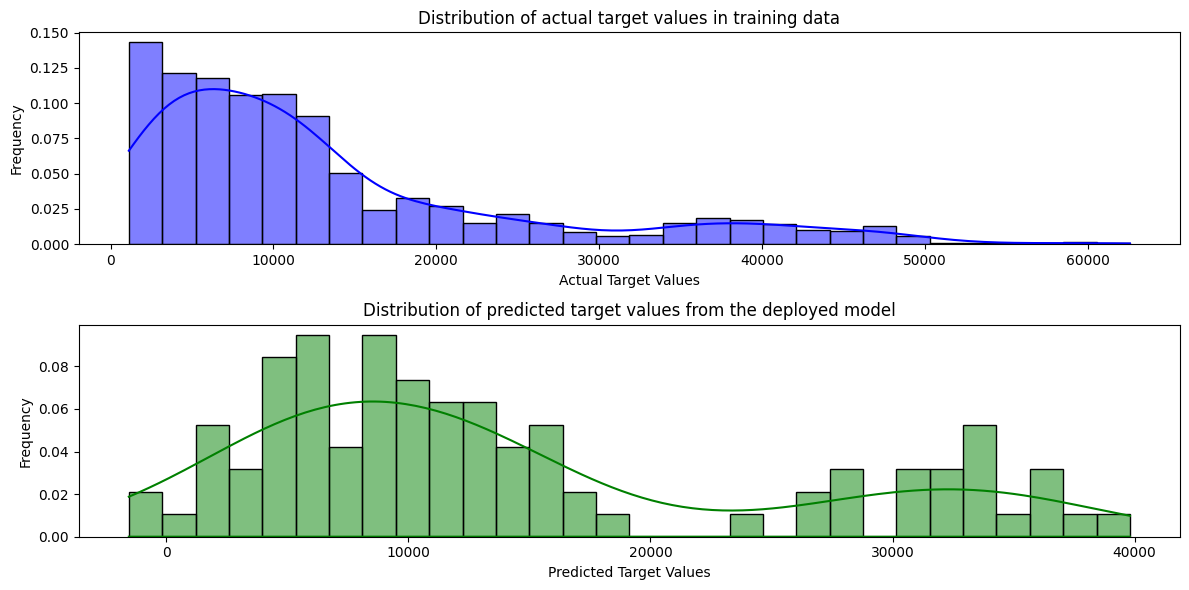

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distributions of actual target values and predicted values
plt.figure(figsize=(12, 6))

plt.subplot(211)
# Plot the histogram with a KDE (Kernel Density Estimation) curve
#sns.countplot(x=prediction_logs_sample_df.prediction, stat='proportion')

#sns.histplot(ytrain, kde=True, stat='density', bins=30, color='blue')

sns.histplot(ytrain, kde=True, stat='proportion', bins=30, color='blue')
plt.title("Distribution of actual target values in training data")
plt.xlabel("Actual Target Values")
plt.ylabel("Frequency")

#Distribution of predicted target values from the deployed model
plt.subplot(212)
# Plot a histogram with a KDE (Kernel Density Estimation) curve for the predicted values from the sample prediction logs DataFrame
# write your code here
#sns.countplot(x=prediction_logs_sample_df.prediction, stat='proportion')
sns.histplot(prediction_logs_sample_df.prediction, kde=True, stat='density', bins=30, color='green')
sns.histplot(prediction_logs_sample_df.prediction, kde=True, stat='proportion', bins=30, color='green')
plt.title("Distribution of predicted target values from the deployed model")
plt.xlabel("Predicted Target Values")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

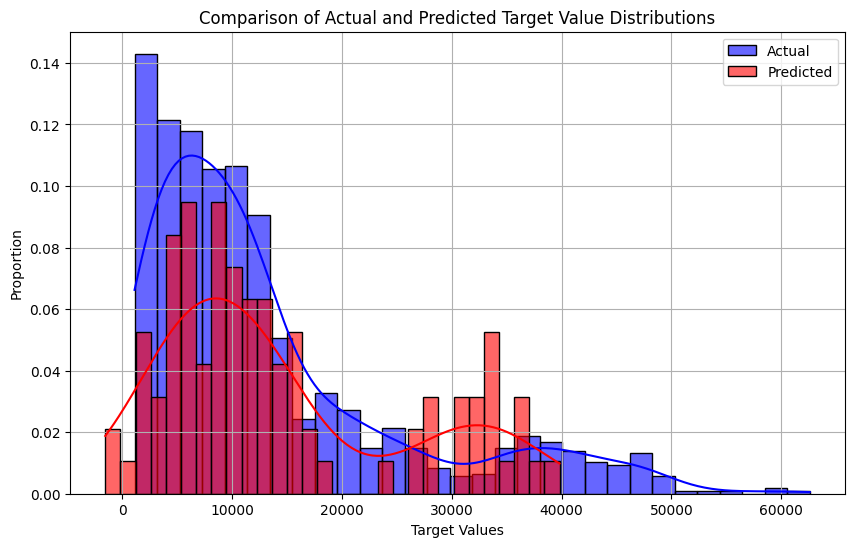

In [ ]:
# If we overlap ytrain data and prediction_logs_sample_df.prediction
plt.figure(figsize=(10, 6))


y_predicted = prediction_logs_sample_df.prediction.values.tolist()

sns.histplot(ytrain, color='blue', label='Actual', kde=True, stat='proportion', bins=30, alpha=0.6)
sns.histplot(y_predicted, color='red', label='Predicted', kde=True, stat='proportion', bins=30, alpha=0.6)

plt.title('Comparison of Actual and Predicted Target Value Distributions')
plt.xlabel('Target Values')
plt.ylabel('Proportion')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
ytest.head()

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180


In [ ]:
predictionlogs_target = prediction_logs_sample_df.prediction
predictionlogs_target.head()

,prediction
173,8231.637651
33,16360.785435
165,13073.689322
78,3767.133835
93,35773.709262


In [ ]:
# Calculate mean of actual values in training data (sum(target y) / len(target y))
mean_training_data = sum(ytest) / len(ytest)

In [ ]:
mean_training_data

12968.31706286941

In [ ]:
# Calculate mean of predicted values in sample logs (sum(logs.prediction) / len(logs.prediction))
mean_sample_logs = sum(prediction_logs_sample_df.prediction) / len(prediction_logs_sample_df.prediction)

In [ ]:
mean_sample_logs

14327.591642421523

In [ ]:
# Calculate variance of actual values in training data

variance = sum((y - mean_training_data)**2 for y in ytest) / len(ytest)

In [ ]:
variance

155248731.49177343

In [ ]:
print(math.sqrt(variance))

12459.884890791465


In [ ]:
# Calculate absolute difference between means
diff = abs(mean_training_data-mean_sample_logs)
diff

1359.2745795521132

In [ ]:
# Check for model drift
if diff > 2 * math.sqrt(variance):
    print("Model Drift Detected!")
else:
    print("No Model Drift!")

No Model Drift!


# Calculating sample variance

Current formula calculates the population variance of the target training data (ytest). In statistics, the population variance is computed by dividing the sum of squared deviations from the mean by the total number of observations. However, when working with a sample of data, it's standard practice to calculate the sample variance to obtain an unbiased estimate of the population variance.

Sample Variance Formula:

The sample variance is calculated by dividing the sum of squared deviations from the mean by
𝑛
−
1, where 𝑛 is the number of observations in the sample. This adjustment accounts for the fact that a sample provides an estimate of the population variance and helps correct the bias in the estimation.

In [ ]:
# Sample variance is calculated by len(ytrain) - 1
# Calculate the mean of the training data
mean_training_data = sum(ytest) / len(ytest)

# Calculate the sum of squared deviations from the mean
sum_squared_deviations = sum((y - mean_training_data)**2 for y in ytest)

# Calculate the sample variance
sample_variance = sum_squared_deviations / (len(ytest) - 1)
sample_variance

155830187.4149636

In [ ]:
import numpy as np

# Convert ytrain to a NumPy array if it's not already
ytrain_array = np.array(ytrain)

# Calculate the sample variance
sample_variance_np = np.var(ytrain_array, ddof=1)
sample_variance_np

144468639.35310397

In [ ]:
# Check for model drift
if diff > 2 * math.sqrt(sample_variance_np):
    print("Model Drift Detected!")
else:
    print("No Model Drift!")

No Model Drift!


## Data Drift Checks

### Live Features vs Training Features

In [ ]:
mean_age_training_data = Xtrain['age'].mean()
mean_age_sample_logs = prediction_logs_sample_df['age'].mean()
std_age_training_data = Xtrain['age'].std()

std_age_sample_logs = prediction_logs_sample_df['age'].std()

In [ ]:
(mean_age_training_data, mean_age_sample_logs)

(39.357009345794395, 36.31578947368421)

In [ ]:
std_age_training_data

14.073960139337256

In [ ]:
mean_feature_training_data = 39.35
mean_feature_sample_logs = 36.31
std_feature_training_data = 14.07

mean_diff = abs(mean_feature_training_data-mean_feature_sample_logs)

if mean_diff > 2 * std_feature_training_data:
    print("Data Drift Detected!")
else:
    print("No Data Drift!")

No Data Drift!


The current model stays in production unless we detect model drift or data drift.

# Convert ipynb to HTML

Instructions:
1. Go to File
2. Download these current working Notebook in to ipynb format
3. Now, run the below code, select the notebook from local where you downloaded the file
4. Wait for few sec, your notebook will automatically converted in to html format and save in your local pc


In [ ]:
# @title HTML Convert
# Upload ipynb
from google.colab import files

f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

# Above code for HTML Convert did not work, use the below code instead

In [ ]:
!apt-get install -y jq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libjq1 libonig5
The following NEW packages will be installed:
  jq libjq1 libonig5
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 357 kB of archives.
After this operation, 1,087 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libonig5 amd64 6.9.7.1-2build1 [172 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libjq1 amd64 1.6-2.1ubuntu3 [133 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 jq amd64 1.6-2.1ubuntu3 [52.5 kB]
Fetched 357 kB in 1s (565 kB/s)
Selecting previously unselected package libonig5:amd64.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../libonig5_6.9.7.1-2build1_amd64.deb ...
Unpacking libonig5:amd64 (6.9.7.1-2build1) ...
Selecting previously unselected package libjq1:am

In [ ]:
!jq 'del(.metadata.widgets)' /content/drive/MyDrive/Adv-Python/Project2_ADV_Python_HF/learner_insurance_charge_prediction.ipynb > /content/drive/MyDrive/Adv-Python/Project2_ADV_Python_HF/temp.json

In [ ]:
mv /content/drive/MyDrive/Adv-Python/Project2_ADV_Python_HF/temp.json /content/drive/MyDrive/Adv-Python/Project2_ADV_Python_HF/learner_insurance_charge_prediction_notebook_.ipynb

In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/Adv-Python/Project2_ADV_Python_HF/learner_insurance_charge_prediction_notebook_.ipynb --output-dir=/content/drive/MyDrive/Adv-Python/Project2_ADV_Python_HF

[NbConvertApp] Converting notebook /content/drive/MyDrive/Adv-Python/Project2_ADV_Python_HF/learner_insurance_charge_prediction_notebook_.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 1619757 bytes to /content/drive/MyDrive/Adv-Python/Project2_ADV_Python_HF/learner_insurance_charge_prediction_notebook_.html


## Power Ahead!